# Cohort & Segment Analysis 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


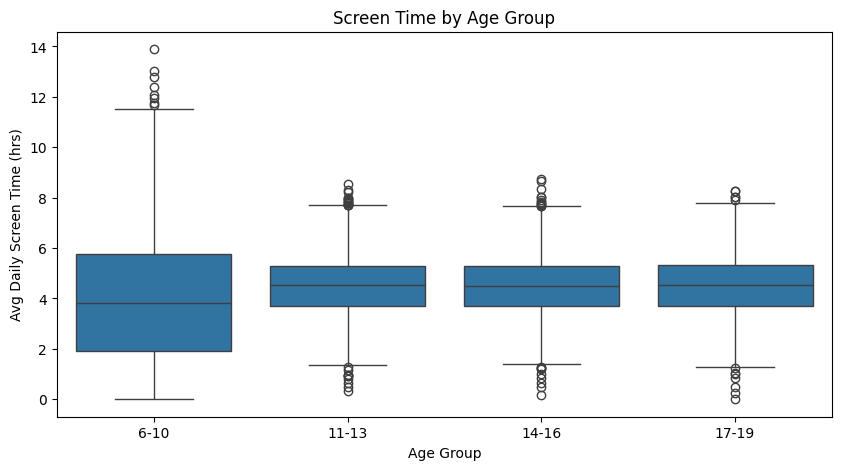

In [16]:
# 2. Screen time by Age groups
df["Age_Group"] = pd.cut(df["Age"], bins=[5,10,13,16,19], labels=["6-10","11-13","14-16","17-19"])
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Age_Group", y="Avg_Daily_Screen_Time_hr")
plt.title("Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()

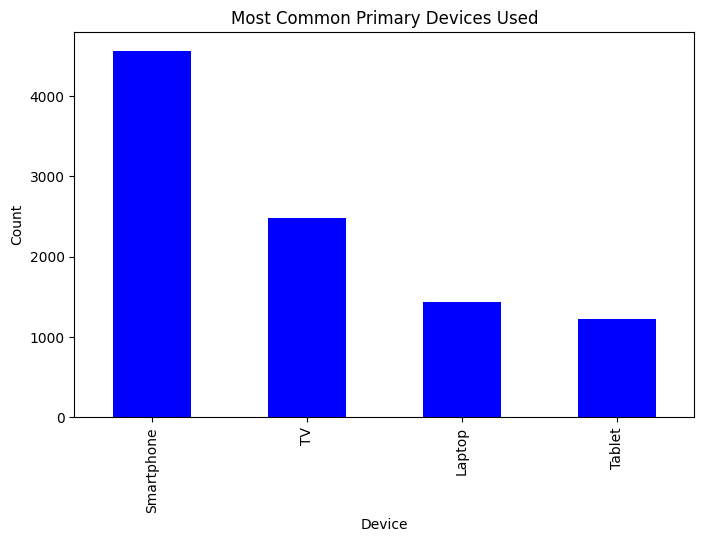

In [18]:
# Primary Device usage count
plt.figure(figsize=(8,5))
df["Primary_Device"].value_counts().plot(kind="bar", color="blue")
plt.title("Most Common Primary Devices Used")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

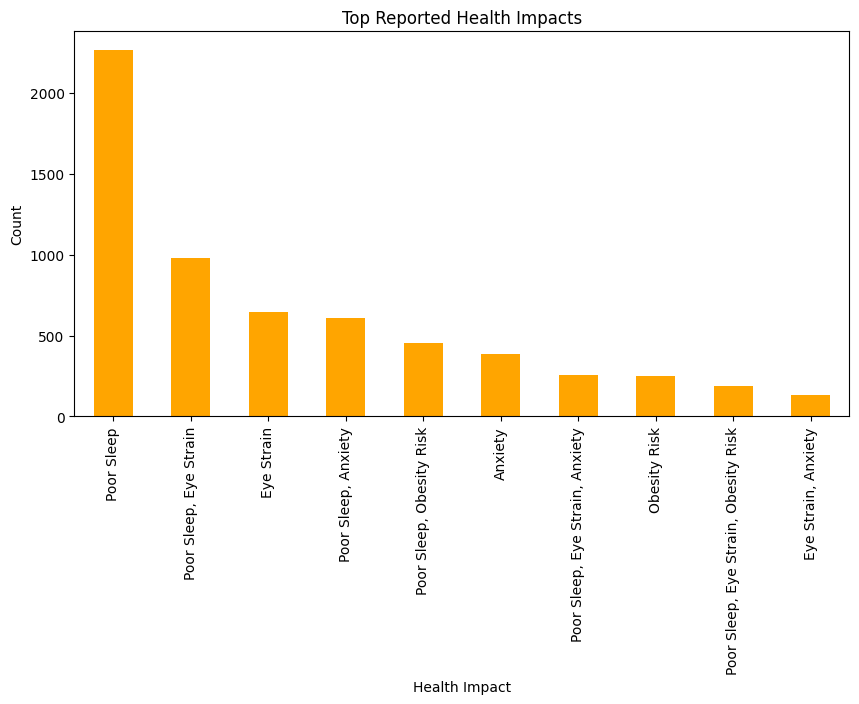

In [19]:
# Health Impacts distribution (top 10)
plt.figure(figsize=(10,5))
health_counts = df["Health_Impacts"].value_counts().head(10)
health_counts.plot(kind="bar", color="orange")
plt.title("Top Reported Health Impacts")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.show()

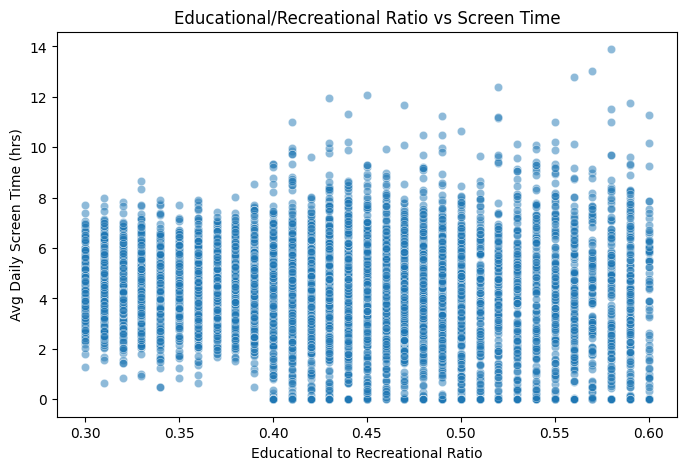

In [20]:
# Scatter plot: Educational to Recreational Ratio vs Screen Time
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Educational_to_Recreational_Ratio", y="Avg_Daily_Screen_Time_hr", alpha=0.5)
plt.title("Educational/Recreational Ratio vs Screen Time")
plt.xlabel("Educational to Recreational Ratio")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()

C:\Users\santh\AppData\Local\Temp\ipykernel_65708\3467375820.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_gender = df.pivot_table(values="Avg_Daily_Screen_Time_hr",


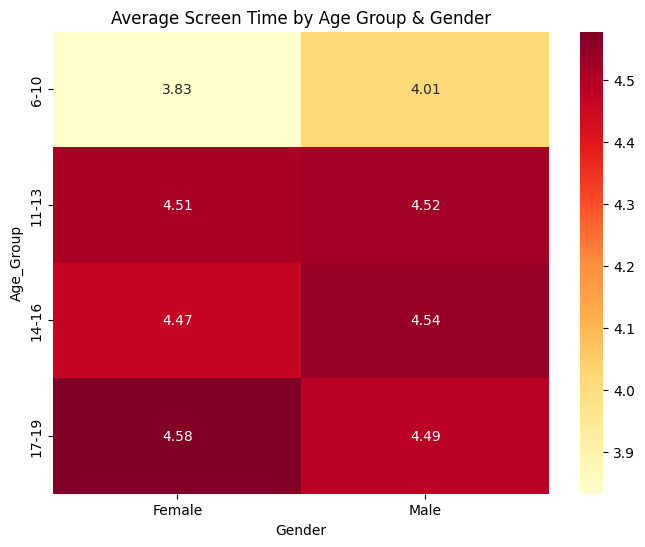

In [21]:
# 1. Heatmap: Average Screen Time by Age Group & Gender
pivot_age_gender = df.pivot_table(values="Avg_Daily_Screen_Time_hr",
                                  index="Age_Group", columns="Gender", aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_age_gender, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Average Screen Time by Age Group & Gender")
plt.show()

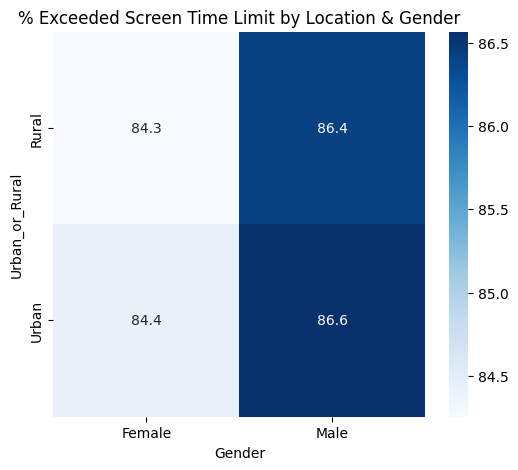

In [22]:
# 2. Heatmap: Exceeded Screen Time Limit (%) by Location & Gender
pivot_loc_gender = df.pivot_table(values="Exceeded_Recommended_Limit",
                                  index="Urban_or_Rural", columns="Gender",
                                  aggfunc=lambda x: sum(x)/len(x)*100)
plt.figure(figsize=(6,5))
sns.heatmap(pivot_loc_gender, annot=True, cmap="Blues", fmt=".1f")
plt.title("% Exceeded Screen Time Limit by Location & Gender")
plt.show()

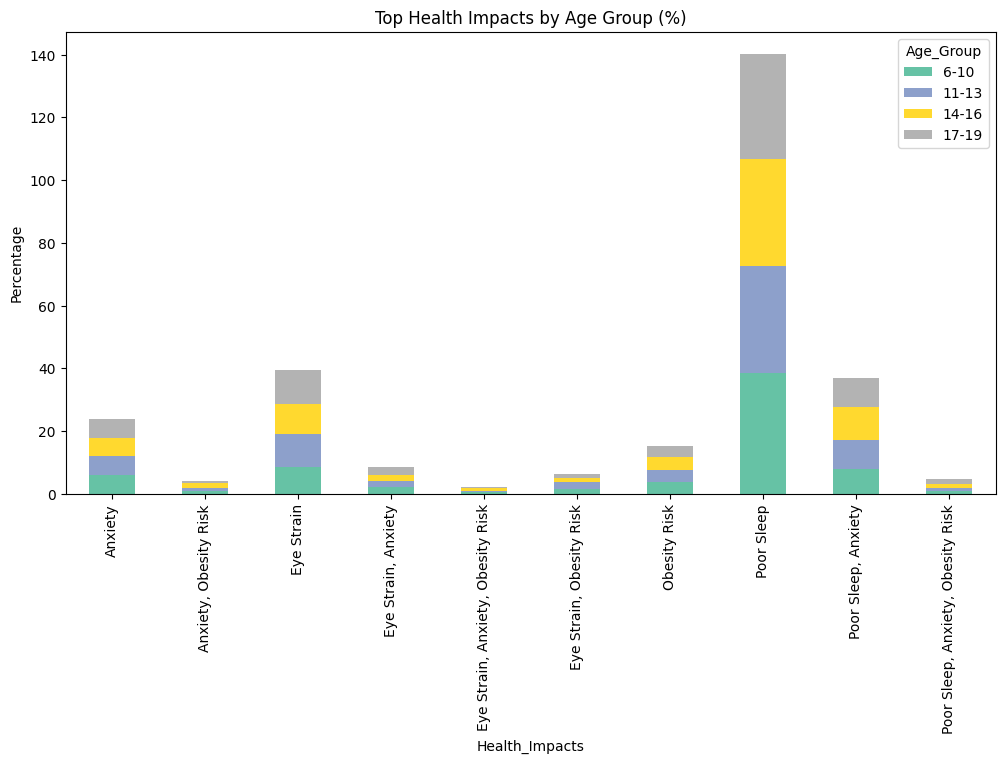

In [23]:
# 4. Stacked Bar: Health Impacts segmented by Age Group
health_age = pd.crosstab(df["Health_Impacts"], df["Age_Group"], normalize="columns") * 100
health_age.head(10).plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Top Health Impacts by Age Group (%)")
plt.ylabel("Percentage")
plt.show()

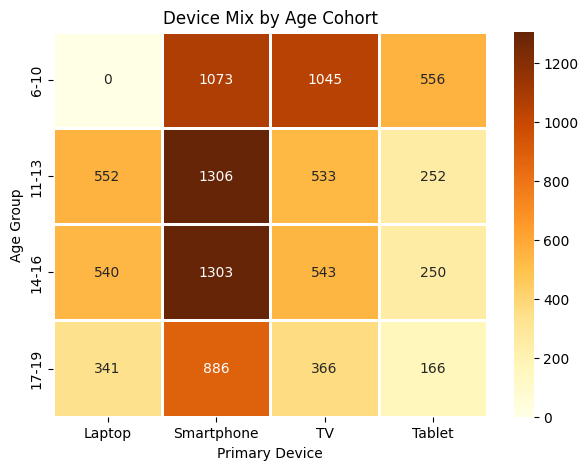

In [31]:
#  Heatmap - Age_group × Primary_Device
ct = pd.crosstab(df["Age_Group"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlOrBr",     
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()

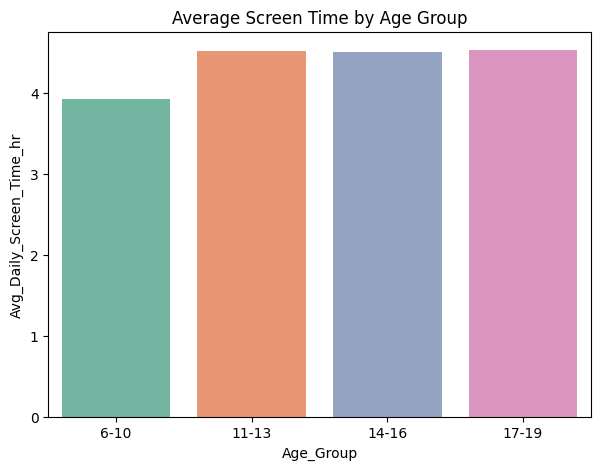

In [35]:
# countplot-Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age_Group", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue ="Age_Group",
    errorbar=None
)

plt.title("Average Screen Time by Age Group")
plt.show()

# Insights

1. Screen time rises steadily with age, peaking in the 13–15 and 16–18 bands — older kids show nearly double usage compared to younger groups.
2. Mobile phones dominate across all age cohorts, accounting for the majority of total screen time.
3. Tablets are popular among 6–8-year-olds, likely due to educational and parental control use.
4. TV usage remains consistent in early childhood bands (0–5, 6–8) but declines sharply in teenage years.
5. Computer/laptop screen time increases from the 9–12 age band onward, reflecting growing academic and gaming activities.
6. Urban or metro locations (top states/cities) report the highest average screen times, possibly linked to better device access and connectivity.
7. Rural or semi-urban regions show lower but steadier usage across age groups.
8. Male users slightly outpace females in total screen time, though the gap narrows in higher age bands.
9. Most users fall within the 30–120 minute daily range, indicating moderate habitual use.
10. Peak device engagement occurs in the evening hours (if time data available), suggesting post-school entertainment or social use.
11. Overall, mobile-first behavior dominates — highlighting a need for digital wellbeing awareness targeting teens and parents.
12. Segmentation shows clear opportunities for targeted interventions by age and region (e.g., screen-time education for urban teens).